<a href="https://colab.research.google.com/github/GomezIker/master-IA-ejercicios/blob/main/Actividad1_Aprendizaje_Automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import preprocessing

In [127]:

housingData = pd.read_csv('housing_train.csv')
housingData.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [128]:
print(housingData.shape)
# 1460 filas x 81 columnas

(1460, 81)


In [129]:
# información general del DF
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## DATOS ESTADÍSTICOS DE LAS VARIABLES NUMÉRICAS

In [130]:
# Características estadísticas básicas de cada variable numérica
# Total de valores no-nulos, media, mediana, desviación estandar, rango, 1º y 3º cuartiles
housingData.describe().T             # muestra solo el análisis de las variables nUméricas
#housingData.describe(include='all')    # Muestra también un análisis de las variables categóricas
#housingData.describe(include=['i8'])   # Haría un análisis únicamente las columnas de tipo int64
#housingData.describe(include=['O'])   # Haría un análisis únicamente de las columnas de tipo Object

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### CATEGORÍAS Y FRECUENCIAS DE LAS VARIABLES CATEGÓRICAS

In [131]:
# Seleccionamos las columnas de tipo object, cambiamos su tipo a 'category' y las analizamos
for column in housingData.select_dtypes(include='O').columns:
  housingData[column] = housingData[column].astype('category')
  print(housingData[column].value_counts())
  print("--------------------")




RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
--------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
--------------------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR  

In [132]:
#housingData.info()

### TRATAMIENTO DE MISSING
Después de ver el análisis de las variables, se ha decidido borrar las siguientes:
- Id: por ser simplemente un contador autoincremental que no aporta información
- Alley: ya que la mayoría de sus registros son nulos. No aporta  información
- PoolQC: Mayoría de registros nulos
- Fence: Mayoría de registros nulos
- MiscFeature: Mayoría de registros nulos
a los numéricos, la media
a los categóricos, la mediana

In [133]:
housingData = housingData.drop(['Id','Alley','PoolQC','Fence','MiscFeature'] , axis = 1)

### MATRIZ DE CORRELACIÓN EXISTENTE ENTRE VARIABLES NUMÉRICAS

Analizando los resultados de la matriz, podemos ver el grado de relación entre 2 variables.
En cuanto a la correlación negativa, vemos que no hay ninguna pareja de variables con una correlación negativa fuerte (menor de -0.5) aunque sí que hay 1 parejas con -0.49 que es:
-  _BsmtUnfSF<>BsmtFinSF1_


En cuanto a la correlación positiva, vemos que hay parejas de variables fuertemente relacionadas como son:
- _OverallQual<>SalePrice con un 0.790982_
- _TotalBsmtSF<>1stFlrSF con un 0.819530_
- _TotRmsAbvGrd<>GrLivArea con un 0.825489_
- _YearBuilt<>GarageYrBlt con un 0.825667_
- _GarageArea<>GarageCars con un 0.882475_

Una lista completa de variables con correlación fuerte (mayor de 0.5) se pueden ver más abajo.

En cuanto a valores independientes (correlación 0), vemos que hay hasta 72 parejas con valores muy cercanos (entre -0.009 y 0.009), como son, por ejemplo:
- _EnclosedPorch<>YrSold con un -0.009916_
- _GrLivArea<>BsmtFinSF2 con un -0.009640_
- _MiscVal<>WoodDeckSF con un -0.009551_
- _GrLivArea<>Id con un 0.008273_
- _PoolArea<>MSSubClass con un 0.008283_
- _GrLivArea<>EnclosedPorch con un 0.009113_
 
La lista completa se puede ver más abajo.

[Text(0.5, 0, 'MSSubClass'),
 Text(1.5, 0, 'LotFrontage'),
 Text(2.5, 0, 'LotArea'),
 Text(3.5, 0, 'OverallQual'),
 Text(4.5, 0, 'OverallCond'),
 Text(5.5, 0, 'YearBuilt'),
 Text(6.5, 0, 'YearRemodAdd'),
 Text(7.5, 0, 'MasVnrArea'),
 Text(8.5, 0, 'BsmtFinSF1'),
 Text(9.5, 0, 'BsmtFinSF2'),
 Text(10.5, 0, 'BsmtUnfSF'),
 Text(11.5, 0, 'TotalBsmtSF'),
 Text(12.5, 0, '1stFlrSF'),
 Text(13.5, 0, '2ndFlrSF'),
 Text(14.5, 0, 'LowQualFinSF'),
 Text(15.5, 0, 'GrLivArea'),
 Text(16.5, 0, 'BsmtFullBath'),
 Text(17.5, 0, 'BsmtHalfBath'),
 Text(18.5, 0, 'FullBath'),
 Text(19.5, 0, 'HalfBath'),
 Text(20.5, 0, 'BedroomAbvGr'),
 Text(21.5, 0, 'KitchenAbvGr'),
 Text(22.5, 0, 'TotRmsAbvGrd'),
 Text(23.5, 0, 'Fireplaces'),
 Text(24.5, 0, 'GarageYrBlt'),
 Text(25.5, 0, 'GarageCars'),
 Text(26.5, 0, 'GarageArea'),
 Text(27.5, 0, 'WoodDeckSF'),
 Text(28.5, 0, 'OpenPorchSF'),
 Text(29.5, 0, 'EnclosedPorch'),
 Text(30.5, 0, '3SsnPorch'),
 Text(31.5, 0, 'ScreenPorch'),
 Text(32.5, 0, 'PoolArea'),
 Text(33.5, 0

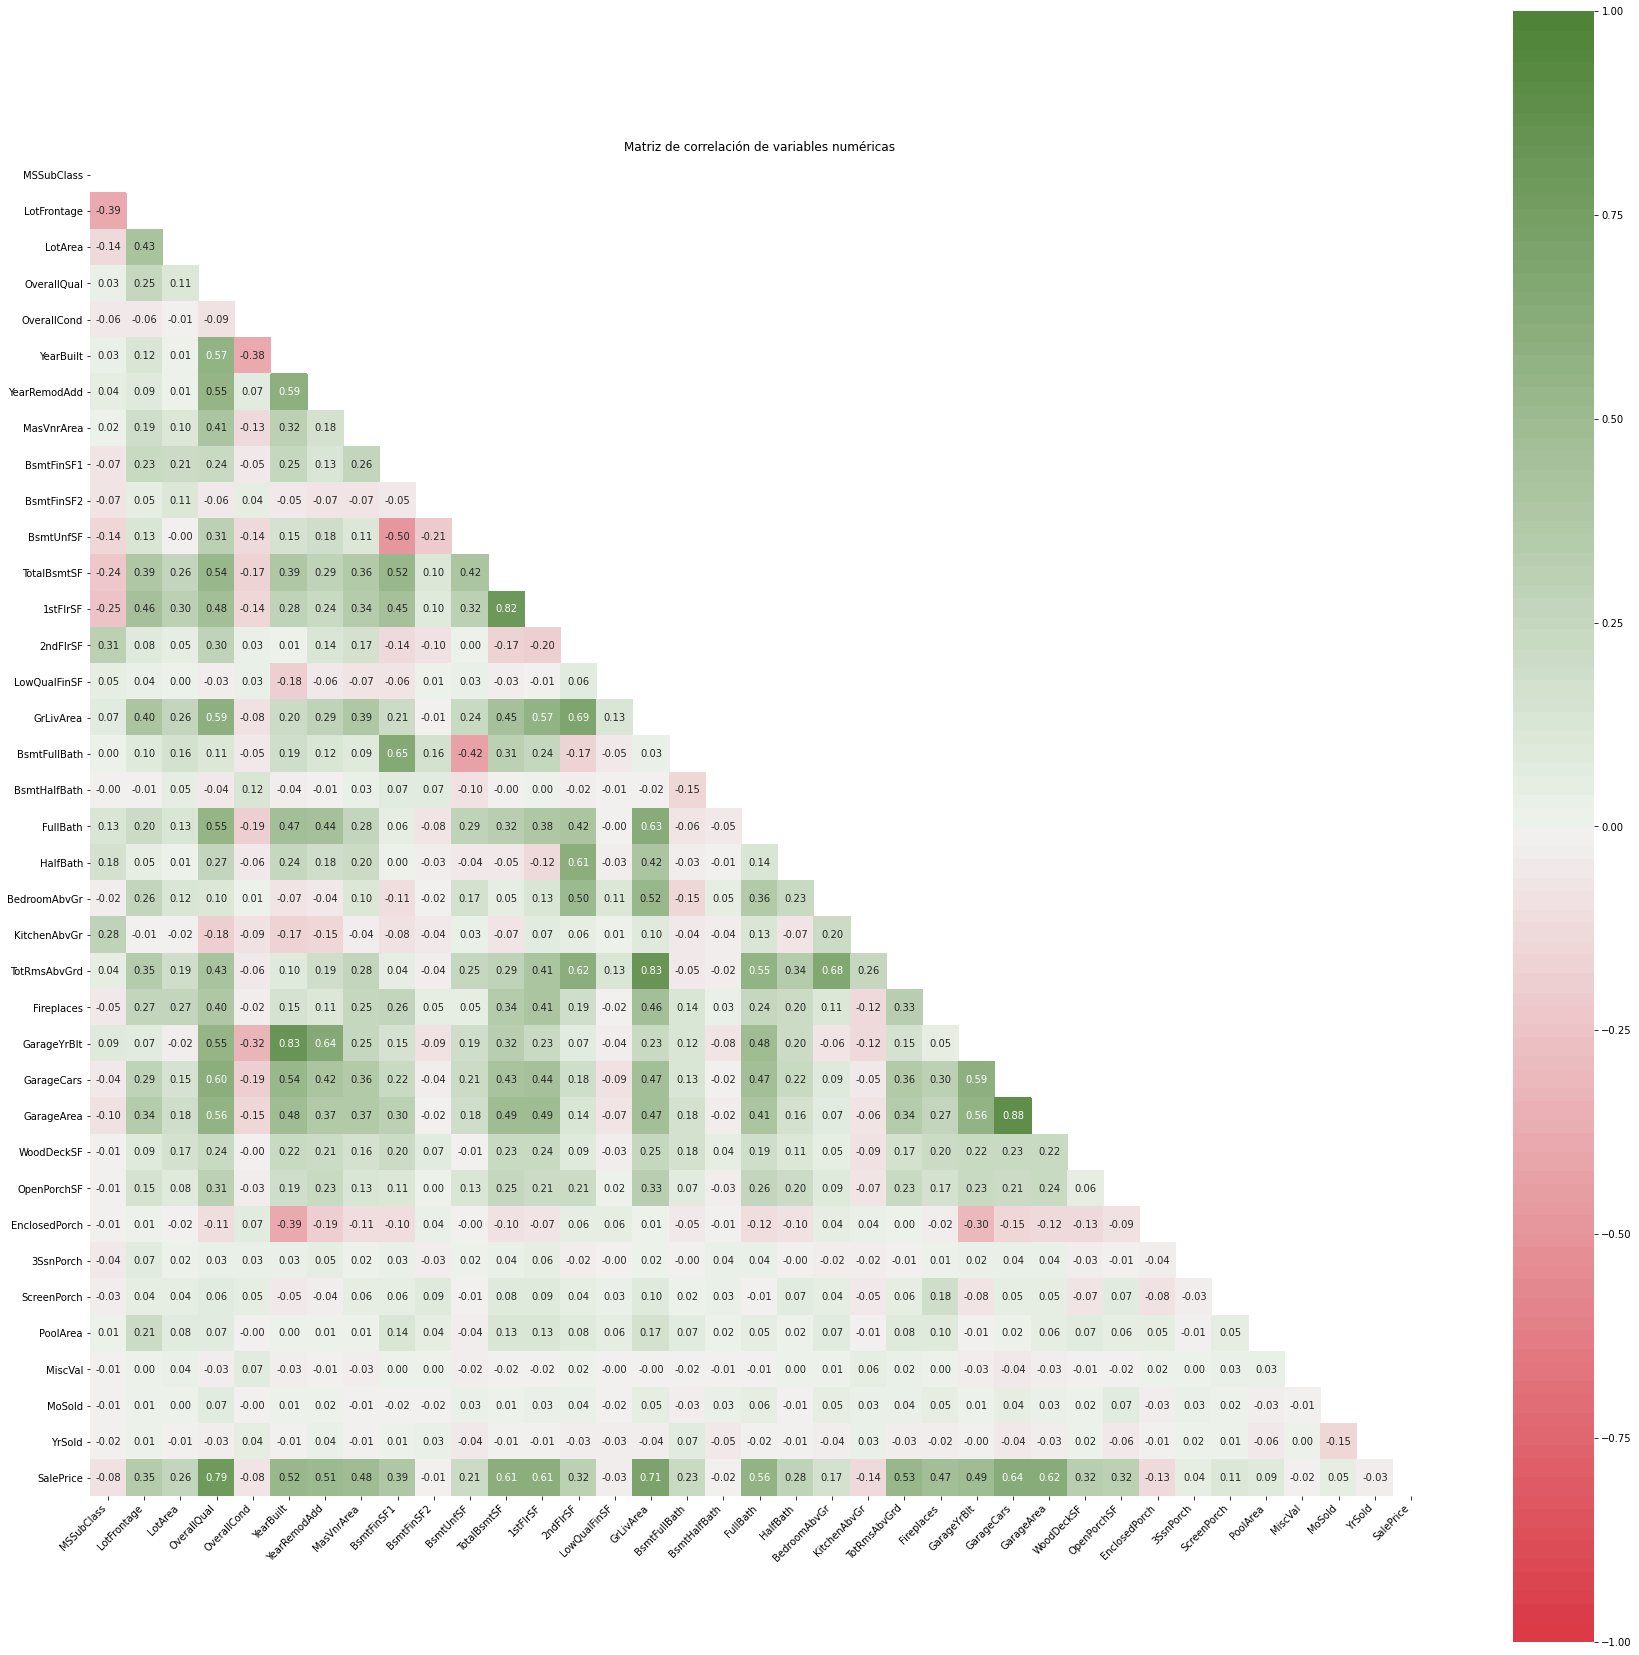

In [134]:
# Seleccionamos solo las variables numéricas para la matriz de correlación
housingDataNumbers = housingData.select_dtypes(include='number')

# Sacamos la matriz de correlaciones, usando el coeficiente de correlación de Pearson
corr = housingDataNumbers.corr(method = 'pearson')

# Mostramos la matriz, cuadrada, con valores entre -1 y 1 y modificamos la paleta de colores
mask = np.zeros_like(corr)  # Fuente:https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize = (30,30))
plt.title("Matriz de correlación de variables numéricas")
ax = sns.heatmap(corr,
                 vmin = -1,
                 vmax = 1,
                 center = 0,
                 cmap = sns.diverging_palette(10, 120, n=100),
                 square = True,
                 annot = True,
                 fmt = ".2f",
                 mask=mask)

# Rotamos las etiquetas del eje horizontal
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

In [135]:
# Al tener tantas variables, se hace complicado analizar la matriz.
# Vamos a sacar aquellos valores y aquellas variables que cumplan un cierto criterio, como que la relación sea menor de -0.5 o mayor de 0.5
# Fuente: https://likegeeks.com/es/matrix-correlacion-python/

pairs = corr.unstack()
# Ahora tenemos pares de variables con su relación, vamos a ordenarlos de menor a mayoyr
sorted_pairs = pairs.sort_values()

# Variables con correlación negativa y correlación fuerte: menos de 0.5
negative_corr = sorted_pairs[sorted_pairs < -0.49]
print (negative_corr)
# Vemos que no hay ninguna menor de 0.5, pero hay 1 parejas que se acerca mucho BsmtUnfSF<>BsmtFinSF1


BsmtFinSF1  BsmtUnfSF    -0.495251
BsmtUnfSF   BsmtFinSF1   -0.495251
dtype: float64


In [136]:
# Variables independientes, correlación 0
indep_corr = sorted_pairs[sorted_pairs.between(-0.01, 0.01)]
index = np.arange(0, len(indep_corr), 2)
print (indep_corr[index])

EnclosedPorch  YrSold          -0.009916
GrLivArea      BsmtFinSF2      -0.009640
MiscVal        WoodDeckSF      -0.009551
MoSold         HalfBath        -0.009050
BsmtHalfBath   EnclosedPorch   -0.008555
YrSold         MasVnrArea      -0.008201
ScreenPorch    FullBath        -0.008106
3SsnPorch      PoolArea        -0.007992
MSSubClass     MiscVal         -0.007683
MiscVal        BsmtHalfBath    -0.007367
LotFrontage    BsmtHalfBath    -0.007234
3SsnPorch      TotRmsAbvGrd    -0.006683
MoSold         MiscVal         -0.006495
MSSubClass     OpenPorchSF     -0.006100
LotFrontage    KitchenAbvGr    -0.006069
MoSold         MasVnrArea      -0.005965
3SsnPorch      OpenPorchSF     -0.005842
BsmtHalfBath   LowQualFinSF    -0.005842
OverallCond    LotArea         -0.005636
WoodDeckSF     BsmtUnfSF       -0.005316
3SsnPorch      HalfBath        -0.004972
               LowQualFinSF    -0.004296
LowQualFinSF   MiscVal         -0.003793
OverallCond    MoSold          -0.003511
WoodDeckSF     O

In [137]:

# Vemos ahora aquello con correlación positiva fuerte
positive_corr = sorted_pairs[sorted_pairs.between(0.49, 1, inclusive=False)] # Seleccionamos aquellos valores que estén entre 0.49 y 1 (sin incluirlos)
index = np.arange(0, len(positive_corr), 2)   # Para no mostrar las parejas repetidas, como el set está ordenado, sólo mostramos los indices pares.
print (positive_corr[index])

BedroomAbvGr  2ndFlrSF        0.502901
SalePrice     YearRemodAdd    0.507101
BedroomAbvGr  GrLivArea       0.521270
BsmtFinSF1    TotalBsmtSF     0.522396
YearBuilt     SalePrice       0.522897
TotRmsAbvGrd  SalePrice       0.533723
OverallQual   TotalBsmtSF     0.537808
GarageCars    YearBuilt       0.537850
GarageYrBlt   OverallQual     0.547766
OverallQual   FullBath        0.550600
              YearRemodAdd    0.550684
TotRmsAbvGrd  FullBath        0.554784
SalePrice     FullBath        0.560664
OverallQual   GarageArea      0.562022
GarageArea    GarageYrBlt     0.564567
GrLivArea     1stFlrSF        0.566024
YearBuilt     OverallQual     0.572323
GarageCars    GarageYrBlt     0.588920
YearBuilt     YearRemodAdd    0.592855
GrLivArea     OverallQual     0.593007
GarageCars    OverallQual     0.600671
1stFlrSF      SalePrice       0.605852
HalfBath      2ndFlrSF        0.609707
SalePrice     TotalBsmtSF     0.613581
2ndFlrSF      TotRmsAbvGrd    0.616423
GarageArea    SalePrice  

In [138]:
# Una vez vista la matriz de correlación, vemos que hay 2 valores fuertemente correlacionados con SalesPrice (>0.70), que son OverallQual y GrLivArea
# Decidimos eliminarlos también
housingData = housingData.drop(['OverallQual','GrLivArea'], axis = 1)

Otro paso importante es trabajar con el decodificado de etiquetas. 
Debido a que los datos categóricos están diferenciados por etiquetas, debemos cambiar esas etiquets a números. Por ejemplo, supongamos una variable cuyas etiquetas sean:
 - label1 --> su nuevo valor sería 0
 - label2 --> su nuevo valor sería 1
 - label 3 --> su nuevo valor seía 2


In [139]:
# Hacemos un decodificado de etiquetas, pero antes, aquellas variables categóricas que tuviesen valore nulos, los sustituímos por la mediana
# Hacemos una copia del DF creado hasta aquí
decodedHousingData = housingData.fillna(housingData.mode()).copy()

for column in decodedHousingData.select_dtypes(include='category').columns:
  decodedHousingData[column] = decodedHousingData[column].cat.codes



In [143]:
decodedHousingData.shape

(1460, 74)

In [144]:
# En el caso de las variables numéricas, decidimos que la mejor opción es cambiar los valores nulos por la media
decodedHousingData = decodedHousingData.fillna(decodedHousingData.mean())

In [145]:
# Ahora ya tenemos todos los nulos resueltos
decodedHousingData.isnull().values.any()

False

In [153]:
  from sklearn.tree import DecisionTreeRegressor

  # Encontrar los mejores parámetros para el arbol de decisión
  dt = DecisionTreeRegressor(random_state=0)
  dt_params = {'max_depth': np.arange(1,50,2), 'min_samples_leaf':np.arange(2,15)}

  # Árboles de decisión
  # Separamos el conjunto inicial en test y train
  # Usamos únicamente las variables numéricas, con los nulos sustituidos por la media
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(decodedHousingData.iloc[: , :-1], 
                                                    decodedHousingData.SalePrice,
                                                    test_size = 0.3,
                                                    random_state = 2)
  print(x_train.shape)
  print(y_train.shape)
  print(x_test.shape)
  print(y_test.shape)

(1022, 73)
(1022,)
(438, 73)
(438,)


In [154]:
from sklearn.model_selection import GridSearchCV

gs_dt = GridSearchCV(dt, dt_params, cv = 3)
gs_dt.fit(x_train, y_train)
a = gs_dt.best_params_

In [160]:
# Vemos que los valores óptimos calculados por GridSearch son 9 y 7
a

{'max_depth': 9, 'min_samples_leaf': 7}

In [254]:
dtr = DecisionTreeRegressor(max_depth = a['max_depth'], min_samples_leaf = a['min_samples_leaf'])
# Entrenamos el modelo
model = dtr.fit(x_train, y_train)
# Comprobaomos las predicciones
y_pred = model.predict(x_test)

In [223]:
# Una vez entrenado el arbol de decisión, vamos a calcular las métricas de error
def genera_metricas(test, prediction):
  print ("Error Máximo: {:.2f}".format(metrics.max_error(test, prediction)))
  print ("Mean Absolute Error (MAE): {:.2f}".format(metrics.mean_absolute_error(test, prediction)))
  print ("Mean Squared Error (MSE): {:.2f}".format(metrics.mean_squared_error(test, prediction)))
  print ("Root Mean Squared Error (RMSE): {:.2f}".format( pow(metrics.mean_squared_error(test, prediction) , 0.5)))
  print ("Logaritmo de Mean Squared Error (RMSLE): {:.2f}".format(metrics.mean_squared_log_error(test, prediction)))
  print ("Median absolute Error (MAE): {:.2f}".format(metrics.median_absolute_error(test, prediction)))
  print ("Coeficiente de determinación R2: {:.2f}".format(metrics.r2_score(test, prediction)))


In [224]:
genera_metricas(y_test, y_pred)

Error Máximo: 351858.50
Mean Absolute Error (MAE): 28161.62
Mean Squared Error (MSE): 2022168007.29
Root Mean Squared Error (RMSE): 44968.52
Logaritmo de Mean Squared Error (RMSLE): 0.05
Median absolute Error (MAE): 16819.34
Coeficiente de determinación R2: 0.69


Text(0, 0.5, 'Datos Predichos')

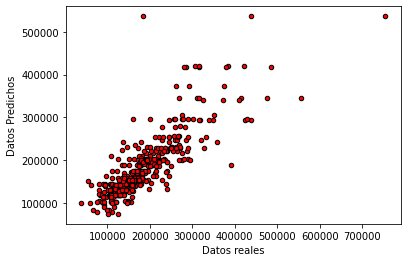

In [179]:
# Mostramos la gráfica de dispersión
plt.scatter(y_test,
            y_pred,
            s=20,
            edgecolor='black',
            c='red',
            label='SalePrice')
plt.xlabel("Datos reales")
plt.ylabel("Datos Predichos")

#### Conclusión
Como podemos ver, el arbol entrenado no es muy fiable. Los valores de error son bastante altos y el coeficiente de determinación R2, con un valor de 0.69, nos indica que las predicciones no son del todo buenas.
Aun así, viendo la gráfica de dispersión, vemos que para valores de SalePrice bajos, la predicción no es mala, pero conforme el precio de venta aumenta, las predicciones se dispersan bastante del eje.

In [183]:
# Aplicamos ahora random forest al problema de regresión
# Al igual que en el ejemplo mostrado por las profesoras, vamos a probar con diferentes valores de hiperparámetros
def obtener_mejor_configuracion(modelo, x, y, num_arboles):
    scores = [[],[],[]]
    errors = [[],[],[]]
    
    for n in num_arboles:
        #Primer caso
        modelo.set_params(n_estimators=n, max_features='auto')
        modelo.fit(x, y)
        scores[0].append(modelo.score(x, y))
        errors[0].append(1 - modelo.oob_score_)
        #Segundo caso
        modelo.set_params(n_estimators=n, max_features=40)
        modelo.fit(x, y)
        scores[1].append(modelo.score(x, y))
        errors[1].append(1 - modelo.oob_score_)
        #Tercer caso
        modelo.set_params(n_estimators=n, max_features='sqrt')
        modelo.fit(x, y)
        scores[2].append(modelo.score(x, y))
        errors[2].append(1 - modelo.oob_score_)
        
    fig, ax = plt.subplots(1 ,2, figsize=(12, 4))

    ax[0].set_title("Score según el número de árboles")
    ax[0].set_xlabel("Número de árboles")
    ax[0].set_ylabel("score")
    ax[0].plot(num_arboles, scores[0], label='m=p')
    ax[0].plot(num_arboles, scores[1], label='m=p/2')
    ax[0].plot(num_arboles, scores[2], label='m=sqrt(p)')
    ax[0].legend()

    ax[1].set_title("Error OOB según el número de árboles")
    ax[1].set_xlabel("Número de árboles")
    ax[1].set_ylabel("error")
    ax[1].plot(num_arboles, errors[0], label='m=p')
    ax[1].plot(num_arboles, errors[1], label='m=p/2')
    ax[1].plot(num_arboles, errors[2], label='m=sqrt(p)')
    ax[1].legend()
    plt.show()
    
    return scores, errors

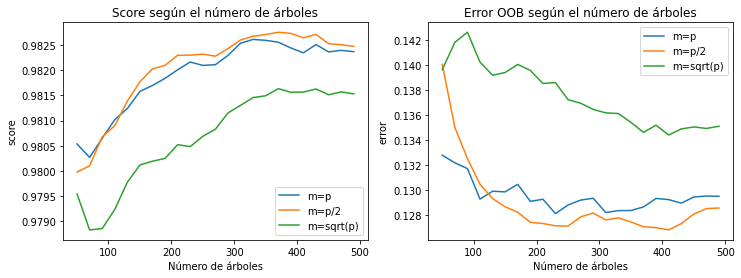

In [184]:
regr = RandomForestRegressor(random_state=40, n_jobs=1, oob_score=True)
num_arboles = np.arange(50,500,20)
scores, errors = obtener_mejor_configuracion(regr, x_train, y_train, num_arboles)

Como se puede apreciar en las gráficas, obtenemos el score más alto y el error mas bajo cuando cuando utilizamos aproximadamente la mitad de las variables (40)

Vemos que con 380 árboles se obtuvo el mayor score. Y vemos también que el menor error se obtuvo con 420 árboles.

In [219]:
print((np.argmax(scores[1]) + 3)*20)
print((np.argmin(errors[1]) + 3)*20)


380
420


In [220]:
regr.set_params(n_estimators=380 , max_features='auto')
regr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=380, n_jobs=1, oob_score=True,
                      random_state=40, verbose=0, warm_start=False)

In [221]:
y_pred2 = regr.predict(x_test)

In [225]:
genera_metricas(y_test, y_pred2)

Error Máximo: 396445.17
Mean Absolute Error (MAE): 19765.80
Mean Squared Error (MSE): 1380597882.41
Root Mean Squared Error (RMSE): 37156.40
Logaritmo de Mean Squared Error (RMSLE): 0.03
Median absolute Error (MAE): 10858.36
Coeficiente de determinación R2: 0.79


Text(0, 0.5, 'Datos Predichos')

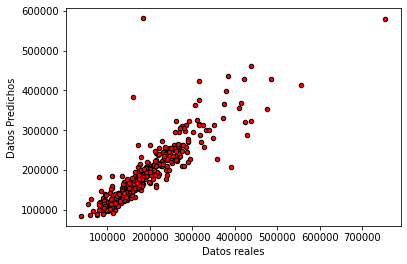

In [226]:
# Mostramos la gráfica de dispersión
plt.scatter(y_test,
            y_pred2,
            s=20,
            edgecolor='black',
            c='red',
            label='SalePrice')
plt.xlabel("Datos reales")
plt.ylabel("Datos Predichos")

### Como podemos observar, random forest funciona un poco mejor que los árboles de decisión. 
### La gráfica de dispersión se muestra más centrada y el coeficiente de determinación se acerca ligeramente más a 1


## EJERCICIO DE CLASIFICACIÓN
Se crean los siguientes grupos:
- grupo1 = SalePrice < 100.000
- grupo2 = SalePrice entre 100.001 y 500.000
- grupo3 = SalePrice > 500.000


In [227]:
# Se crean los siguientes grupos

In [248]:
decodedHousingData.loc[decodedHousingData.SalePrice <= 100000, 'SalePriceCat'] = 'grupo1'
decodedHousingData.loc[decodedHousingData.SalePrice.between(100001, 500000), 'SalePriceCat'] = 'grupo2'
decodedHousingData.loc[decodedHousingData.SalePrice >= 500001, 'SalePriceCat'] = 'grupo3'

# Una vez categorizada la variable objetivo, podemos borrar la numérica
decodedHousingData = decodedHousingData.drop(['SalePrice'], axis = 1)

In [252]:
# Dividimos los conjuntos de entrenamiento y test en 70-30
ycat = decodedHousingData.SalePriceCat.values
le = preprocessing.LabelEncoder()
ycat = le.fit_transform(ycat)

x_train_cat, x_test_cat, y_train_cat, y_test_cat = train_test_split(decodedHousingData.iloc[: , :-1].values, 
                                                    ycat,
                                                    test_size = 0.3,
                                                    random_state = 20)

print(x_train_cat.shape)
print(y_train_cat.shape)
print(x_test_cat.shape)
print(y_test_cat.shape)

(1022, 73)
(1022,)
(438, 73)
(438,)


In [256]:
from sklearn.tree import DecisionTreeClassifier

# HAcemos lo mismo que antes para sacar los valores óptimos del número de hojas y profundidad
dt_cat = DecisionTreeClassifier(random_state=30)
dt_params_cat = {'max_depth': np.arange(1,50,2), 'min_samples_leaf':np.arange(2,15)}

gs_dt_cat = GridSearchCV(dt_cat, dt_params_cat, cv = 3)
gs_dt_cat.fit(x_train_cat, y_train_cat)
a = gs_dt_cat.best_params_

In [260]:
a['max_depth']

3

### Vemos que los valores óptimos obtenidos son 'max_depth': 3 y  'min_samples_leaf': 3

In [261]:
dt_cat.set_params(max_depth = a['max_depth'] , min_samples_leaf = a['min_samples_leaf'])
# Entrenamos el modelo
model_cat = dt_cat.fit(x_train_cat, y_train_cat)
# Comprobaomos las predicciones
y_pred_cat = model_cat.predict(x_test_cat)

In [264]:
metrics.confusion_matrix(y_test_cat , y_pred_cat)

array([[  8,  28,   0],
       [  5, 394,   0],
       [  0,   2,   1]])

In [283]:
print ("Accuracy: {:.4f} ".format(metrics.accuracy_score(y_test_cat, y_pred_cat)))

Accuracy: 0.9201 


In [296]:
def matriz_confusion (real, predicted, clases):
  mc = metrics.confusion_matrix(real,predicted)
  matriz_confusion = pd.DataFrame(mc , index = [i for i in clases], columns = clases)

  fig, ax = plt.subplots()
  ax = sns.heatmap(
        matriz_confusion,
        fmt='.4g',
        annot = True,
        annot_kws={'size': 16},
        cmap= 'Blues_r',
        cbar = False)
  ax.xaxis.set_label_position('top')
  pos, textvals = plt.yticks(np.arange(3)+0.5, clases, rotation=1, va='center')
  plt.title('Matriz de confusión')
  plt.ylabel('Clase actual')
  plt.xlabel('Clase de predicción')
  plt.ylim(3, 0)
  plt.show()


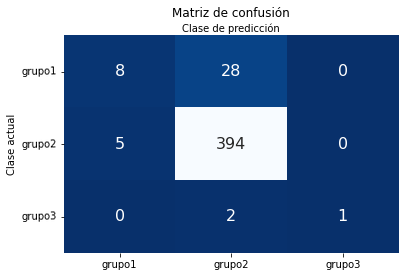

In [297]:
clases = ['grupo1','grupo2','grupo3']
matriz_confusion(y_test_cat, y_pred_cat, clases=clases)

### Por falta de tiempo, no he podido realizar el ejercicio de clasificación con random forest